We found the following steady-state solution in class:
\begin{equation}
u_x(y)=\frac{-g}{\nu}\cdot sin(\alpha)(\frac{1}{2}y^2-Hy)
\end{equation}
From the following equation to be solved without assuming steady state with diffusion code
\begin{equation}
(\partial+ \vec{u} \cdot \vec{\nabla})u_x=gsin(\alpha)+\nu\nabla^2\vec{u_x}
\end{equation}
Which becomes 
\begin{equation}
\partial_t u=gsin(\alpha)+\nu\partial_y^2u_x
\end{equation}
in 1D, where 
\begin{equation}
\partial_t u=\nu\partial_y^2u_x
\end{equation}
is solved with diffusion code and the gravity factor is added in afterwards.


<IPython.core.display.Javascript object>


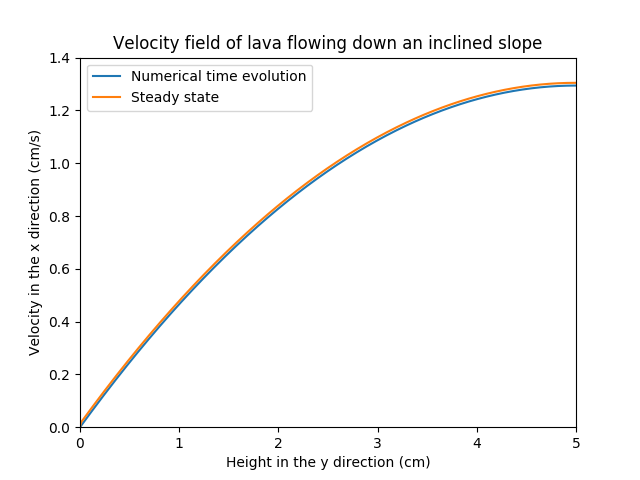

In [8]:
#@author: Alexandre Stuart. Collaborators: Ruijia Yang and Yacine Benkirane 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Set up parameters
dt = 0.00005
t_final=0.06
dx = 0.01
g=1000#cm/s**2
nu=2.5*10**3#cm**2/s
alpha=np.pi/12#rad
H=5#cm
beta = nu*dt/dx**2

#Gravity factor g*sin(alpha)
g_fac=g*np.sin(alpha)

#setting up grid
x = np.arange(0, 5, dx)

#steady state
s = -g/nu*np.sin(alpha)*(0.5*x**2-H*x)

#initialize
f = np.zeros(len(x))

# Set up plot
plt.ion()
fig, ax = plt.subplots(1,1)

# Plotting steady state in the background for reference
ax.plot(x, s)

# Initializing velocity field plot
plot, = ax.plot(x, f)

# Setting up matrices for diffusion operator
A = np.eye(len(x)) * (1.0 + 2.0 * beta) + np.eye(len(x), k=1) * -beta + np.eye(len(x), k=-1) * -beta

#no-slip boundary condition
A[0][0]=1
A[0][1]=0

#no-stress boundary condition
A[-1][-1]=1+beta

# Setting the axis limits for visualization
ax.set_xlim([0,5])
ax.set_ylim([0,1.4])

# this draws the objects on the plot
fig.canvas.draw()

t=0
#time evolution
while t<=t_final:
    if t!=0: #t=0 is excluded as we assume velocity=0 at t=0
        #Solving for the velocity field at time t
        f = np.linalg.solve(A, f)
        #Adding the gravity factor 
        f+=g_fac*dt
        #No slip boundary condition
        f[0]=0
    #incrementing time
    t+=dt
    #removing previous plot data
    ax.collections=[]
    ax.patches=[]
    # update the plot
    plot.set_ydata(f)
    
    plt.legend(['Numerical time evolution', 'Steady state'])
    plt.title('Velocity field of lava flowing down an inclined slope')
    plt.xlabel('Height in the y direction (cm)')
    plt.ylabel('Velocity in the x direction (cm/s)')
    fig.canvas.draw()
    plt.pause(0.0001)

As can be seen, there is a slight overshoot in the final velocity calculated by the diffusion code as compared to the steady state which can be reduced by reducing the timestep. This error is likely due to time and grid resolution.